**DATA PREPROCESSING**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time



In [126]:
df = pd.read_excel("/content/kohkiloyeh (1).xlsx")
df.head(5)

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Degree   100 non-null    object
 1   caprice  100 non-null    object
 2   topic    100 non-null    object
 3   lmt      100 non-null    object
 4   lpss     100 non-null    object
 5   pb       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [128]:
le = LabelEncoder()
le.fit(df["pb"])
y = le.transform(df["pb"])



In [129]:
y.shape

(100,)

In [130]:
print(" number of positive class ",(y==1).sum())
print(" number of negative class ",(y==0).sum())

 number of positive class  68
 number of negative class  32


In [131]:
df.drop(columns=["pb"],inplace=True)
df.head(5)



,Degree,caprice,topic,lmt,lpss
0,high,left,impression,yes,yes
1,high,left,political,yes,yes
2,medium,middle,tourism,yes,yes
3,high,left,political,yes,yes
4,medium,middle,news,yes,yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


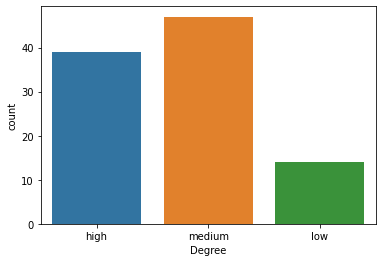

In [132]:
sns.countplot(df['Degree'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


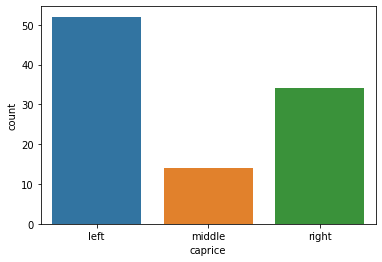

In [133]:
sns.countplot(df['caprice'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


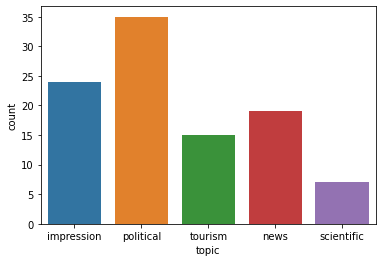

In [134]:
sns.countplot(df['topic'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


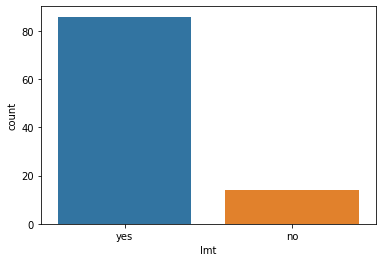

In [135]:
sns.countplot(df['lmt'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


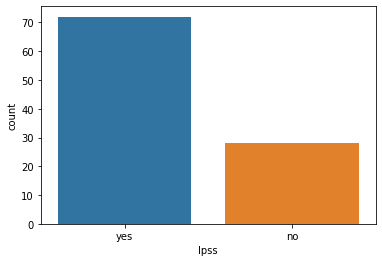

In [136]:
sns.countplot(df['lpss'])
plt.show()

In [137]:
def encoding(df,col):
  oh = OneHotEncoder(drop = 'first')
  temp = df[col].values.reshape(-1,1)
  oh.fit(temp)
  out_val = oh.transform(temp).toarray()
  out_feature = oh.get_feature_names([col])
  df_new = pd.DataFrame(out_val,columns=[out_feature])
  df_final = pd.concat([df,df_new,],axis=1)
  df_final.drop(columns =[col],inplace=True)
  return df_final




In [138]:
cols = df.columns
cols


Index(['Degree', 'caprice', 'topic', 'lmt', 'lpss'], dtype='object')

In [139]:
for col in cols:
  df = encoding(df,col)

In [140]:
df.head(5)

,"(Degree_low,)","(Degree_medium,)","(caprice_middle,)","(caprice_right,)","(topic_news,)","(topic_political,)","(topic_scientific,)","(topic_tourism,)","(lmt_yes,)","(lpss_yes,)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


#**MODELLING**

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=0)

In [142]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(x_train,y_train)
y_pred_train=clf1.predict(x_train)
y_pred_test1=clf1.predict(x_test)

In [144]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test1)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.8428571428571429
Testing Accuracy:  0.6666666666666666


In [145]:
from sklearn.svm import SVC
clf2=SVC(C=1,kernel='rbf')
clf2.fit(x_train,y_train)
y_pred_train=clf2.predict(x_train)
y_pred_test2=clf2.predict(x_test)

In [146]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test2)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.9
Testing Accuracy:  0.8


In [147]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=100,max_depth=5)
clf3.fit(x_train,y_train)
y_pred_train=clf3.predict(x_train)
y_pred_test3=clf3.predict(x_test)

In [148]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test3)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.9142857142857143
Testing Accuracy:  0.8


In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  

In [151]:
start = time.time()
cross_knn = cross_val_score(knn,df.values,y.ravel(),cv=5)
end = time.time()
print(' execution time of knn is ',end-start)

 execution time of knn is  0.026160001754760742


In [152]:
print('mean validation accuracy of knn ',(cross_knn.sum())/5)

mean validation accuracy of knn  0.7300000000000001


In [153]:
from sklearn.svm import SVC
svm_obj = SVC()  

In [154]:
start = time.time()
cross_svm = cross_val_score(svm_obj,df.values,y.ravel(),cv=5)
end = time.time()
print(' execution time of svm is ',end-start)

 execution time of svm is  0.012663841247558594


In [155]:
print('mean validation accuracy of svm ',(cross_svm.sum())/5)

mean validation accuracy of svm  0.85


In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [157]:
start = time.time()
cross_rfc = cross_val_score(rfc,df.values,y.ravel(),cv=5)
end = time.time()
print(' execution time of rfc is ',end-start)

 execution time of rfc is  0.8538663387298584


In [158]:
print('mean validation accuracy of rfc ',(cross_rfc.sum())/5)

mean validation accuracy of rfc  0.8800000000000001


**HYPERPARAMETER TUNING**

*KNN*

In [159]:
param_knn = {
    'n_neighbors': list(range(1,10)),
    'leaf_size' : list(range(1,10)),
    'p': [1,2]
}



In [160]:
from sklearn.model_selection import RandomizedSearchCV


In [161]:
model_tuned_knn = RandomizedSearchCV(knn,param_knn,cv=5)
model_tuned_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'p': [1, 2]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=

In [162]:
print(model_tuned_knn.best_params_)

{'p': 2, 'n_neighbors': 6, 'leaf_size': 5}


In [163]:
print('mean vald accuracy train ',model_tuned_knn.best_score_)

mean vald accuracy train  0.8428571428571427


In [164]:
model_tuned_knn = RandomizedSearchCV(knn,param_knn,cv=5)
model_tuned_knn.fit(x_test,y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'p': [1, 2]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=

In [165]:

print(model_tuned_knn.best_params_)
print('mean vald accuracy test ',model_tuned_knn.best_score_)

{'p': 1, 'n_neighbors': 3, 'leaf_size': 5}
mean vald accuracy test  0.8333333333333333


*SVM*

In [166]:
param_svm = {
    'C': [0.05,0.1,0.5,1,2,3,5,10],
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto']
}

In [167]:
model_tuned_svm = RandomizedSearchCV(svm_obj,param_svm,cv=5,random_state=42)
model_tuned_svm.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.05, 0.1, 0.5, 1, 2, 3, 5, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [168]:
print(model_tuned_svm.best_params_)

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [169]:
print('mean vald accuracy of SVM train ',model_tuned_svm.best_score_)

mean vald accuracy of SVM train  0.8142857142857143


In [170]:
model_tuned_svm = RandomizedSearchCV(svm_obj,param_svm,cv=5,random_state=42)
model_tuned_svm.fit(x_test,y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.05, 0.1, 0.5, 1, 2, 3, 5, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [171]:
print(model_tuned_svm.best_params_)

{'kernel': 'poly', 'gamma': 'scale', 'C': 1}


In [172]:
print('mean vald accuracy of SVM test ',model_tuned_svm.best_score_)

mean vald accuracy of SVM test  0.8333333333333333


*Random Forest*

In [173]:
param_rfc = {
    'n_estimators': [10,50,100,150,200],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5,10,15]
}

In [174]:
model_tuned_rfc = RandomizedSearchCV(rfc,param_rfc,cv=5,random_state=42)
model_tuned_rfc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [175]:
print(model_tuned_rfc.best_params_)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 15}


In [176]:
print('mean vald accuracy of Random Forest train ',model_tuned_rfc.best_score_)

mean vald accuracy of Random Forest train  0.8142857142857144


In [177]:
model_tuned_rfc = RandomizedSearchCV(rfc,param_rfc,cv=5,random_state=42)
model_tuned_rfc.fit(x_test,y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [178]:
print(model_tuned_rfc.best_params_)

{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 15}


In [179]:
print('mean vald accuracy of Random Forest test ',model_tuned_rfc.best_score_)

mean vald accuracy of Random Forest test  0.8333333333333333


**CONFUSION MATRIX**

In [180]:
from sklearn.metrics import plot_confusion_matrix 

In [181]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test1)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.70      0.90      0.79        21

    accuracy                           0.67        30
   macro avg       0.52      0.51      0.48        30
weighted avg       0.59      0.67      0.60        30



confusion matrix for KNN


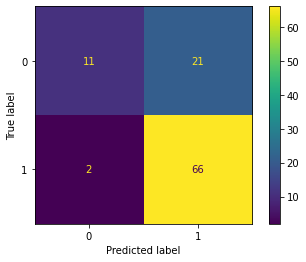

In [182]:
print("confusion matrix for KNN")
plot_confusion_matrix(model_tuned_knn,df.values,y.ravel())

In [183]:
cr=classification_report(y_test,y_pred_test2)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.83      0.90      0.86        21

    accuracy                           0.80        30
   macro avg       0.77      0.73      0.74        30
weighted avg       0.79      0.80      0.79        30



confusion matrix for SVM


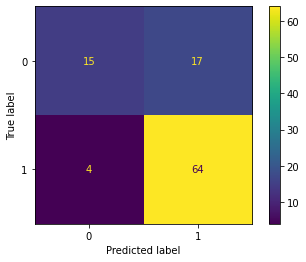

In [184]:
print("confusion matrix for SVM")
plot_confusion_matrix(model_tuned_svm,df.values,y.ravel())

In [185]:
cr=classification_report(y_test,y_pred_test3)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.83      0.90      0.86        21

    accuracy                           0.80        30
   macro avg       0.77      0.73      0.74        30
weighted avg       0.79      0.80      0.79        30



confusion matrix for RF


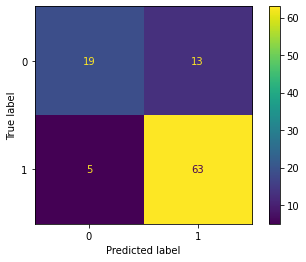

In [186]:
print("confusion matrix for RF")
plot_confusion_matrix(model_tuned_rfc,df.values,y.ravel())